In [7]:
# Initial imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc, roc_curve

import time
from kappa_score import qwkappa

from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
# read in test and train data from S3
import pandas as pd
orig_test = pd.read_csv("https://project4-wine-quality-2023.s3.us-west-2.amazonaws.com/test.csv")
orig_train = pd.read_csv("https://project4-wine-quality-2023.s3.us-west-2.amazonaws.com/train.csv")

In [9]:
# Drop 'ID' columns
orig_test = orig_test.drop(columns='Id')
orig_train = orig_train.drop(columns='Id')

# Create a place to save any generated files
rf_roc_output_path = os.path.join('../random forest output','ROC_AUC')
os.makedirs(rf_roc_output_path, exist_ok = True)

In [10]:
# Split the data into training and testing sets
X_train = orig_train.drop('quality', axis=1)
y_train = orig_train['quality'].copy()
X_test = orig_test.copy()
quality_rating = list(y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  stratify= quality_rating,
                                                  test_size = 0.2, 
                                                  random_state = 42) #because it is the answer :)

In [12]:
# Create a Random Forest Regressor
model = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [30],
    # 'learning_rate': [0.05],
    'max_depth': [2]
}

# Use stratified k-fold cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
start_time = time.time()
grid_search = GridSearchCV(model, param_grid, cv=skfold, verbose=3)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_
grid_search_time = time.time()

# Make predictions on the test data using the best model
y_pred = best_rf.predict(X_val)
y_score = best_rf.predict_proba(X_val) # this line is needed to create ROC charts

# Report how long it took to complete Grid search and prediction
end_time = time.time()
grid_time = grid_search_time - start_time
pred_time = end_time - grid_search_time
tot_time = end_time - start_time


print("--------------------------------------------------------------------------------------------------")
print()
print(f"Time to complete Grid Search: {grid_time:.6f} seconds")
print(f"Time to complete prediction: {pred_time:.6f} seconds")
print(f"Total time to complete Grid Search and prediction: {tot_time:.6f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......max_depth=2, n_estimators=30;, score=0.556 total time=   0.0s
[CV 2/5] END ......max_depth=2, n_estimators=30;, score=0.541 total time=   0.0s
[CV 3/5] END ......max_depth=2, n_estimators=30;, score=0.541 total time=   0.0s
[CV 4/5] END ......max_depth=2, n_estimators=30;, score=0.587 total time=   0.0s
[CV 5/5] END ......max_depth=2, n_estimators=30;, score=0.543 total time=   0.0s
--------------------------------------------------------------------------------------------------

Time to complete Grid Search: 0.345753 seconds
Time to complete prediction: 0.011369 seconds
Total time to complete Grid Search and prediction: 0.357122 seconds


In [3]:

wine_train_data = pd.read_csv("C:/Users/yagin/bootcamp/Group- Project-4/Project-4/train.csv")
wine_train_data.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [4]:
#take a look at the data types and number of values values 
print(wine_train_data.dtypes)
print("_______________________________________")
print('Number of values in the training data:')
wine_train_data['Id'].count() 

Id                        int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
_______________________________________
Number of values in the training data:


2056

In [5]:
y = wine_train_data['quality'].values.reshape(-1, 1)
print(f" Preview of target y values: {y[:5]}")
#features
X = wine_train_data.copy()
X.drop('quality', axis = 1, inplace = True)
X.head()

 Preview of target y values: [[6]
 [6]
 [7]
 [5]
 [6]]


,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5


In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [7]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [8]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Create a random forest classifier
rf_model = RandomForestClassifier(random_state=42)

In [11]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

C:\Users\yagin\AppData\Local\Temp\ipykernel_22144\478868177.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


In [12]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [13]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0",1, 2, 3, 4, 5], columns=["Predicted 0", 1, 2, 3, 4,5 ]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [14]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,1,2,3,4,5
Actual 0,0,0,1,1,0,0
1,0,0,6,2,0,0
2,0,0,114,54,1,0
3,0,0,46,99,13,0
4,0,0,9,42,18,0
5,0,0,1,4,1,0


Accuracy Score : 0.5606796116504854
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.64      0.67      0.66       169
           6       0.49      0.63      0.55       158
           7       0.55      0.26      0.35        69
           8       0.00      0.00      0.00         6

    accuracy                           0.56       412
   macro avg       0.28      0.26      0.26       412
weighted avg       0.54      0.56      0.54       412



c:\anaconda3\envs\test\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\test\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\test\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
rf_model.feature_importances_

array([0.07941775, 0.0704832 , 0.08021276, 0.06317036, 0.06281355,
       0.06820936, 0.05936273, 0.0911592 , 0.08031477, 0.0690797 ,
       0.14079344, 0.13498318])

In [16]:
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns))


[(0.059362727721808374, 'free sulfur dioxide'),
 (0.06281355184015133, 'residual sugar'),
 (0.06317036156598371, 'citric acid'),
 (0.0682093563056128, 'chlorides'),
 (0.06907970238464581, 'pH'),
 (0.07048320318024183, 'fixed acidity'),
 (0.0794177533720754, 'Id'),
 (0.08021276353770652, 'volatile acidity'),
 (0.08031476948799153, 'density'),
 (0.09115919997016238, 'total sulfur dioxide'),
 (0.13498317563298295, 'alcohol'),
 (0.1407934350006374, 'sulphates')]

In [17]:
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns))

[(0.059362727721808374, 'free sulfur dioxide'),
 (0.06281355184015133, 'residual sugar'),
 (0.06317036156598371, 'citric acid'),
 (0.0682093563056128, 'chlorides'),
 (0.06907970238464581, 'pH'),
 (0.07048320318024183, 'fixed acidity'),
 (0.0794177533720754, 'Id'),
 (0.08021276353770652, 'volatile acidity'),
 (0.08031476948799153, 'density'),
 (0.09115919997016238, 'total sulfur dioxide'),
 (0.13498317563298295, 'alcohol'),
 (0.1407934350006374, 'sulphates')]

<Axes: title={'center': 'Features Importances'}, xlabel='1'>

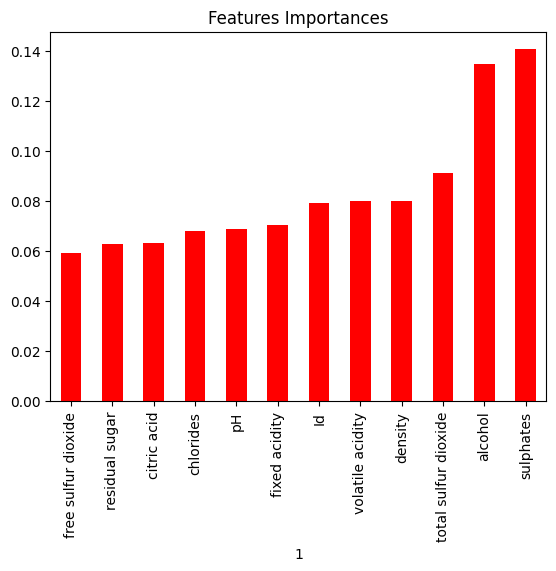

In [18]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='bar', color='red', title= 'Features Importances', legend=False)

In [19]:
#get kappa score
from kappa_score import qwkappa
import numpy as np
qwkappa(y_test-3, predictions-3)

0.4428303450682719

In [20]:
#testing 
predictions -3

array([3, 3, 3, 2, 4, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 4, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 4, 2, 2, 3, 4, 3, 3, 2,
       2, 3, 3, 2, 3, 4, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 4, 3,
       2, 2, 3, 3, 2, 3, 3, 4, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2,
       3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 4, 3, 3, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 4, 3, 3, 3, 2, 2, 3, 4, 2, 3, 2, 4,
       2, 3, 2, 3, 2, 4, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3,
       2, 3, 3, 3, 2, 2, 2, 3, 2, 4, 3, 3, 2, 2, 3, 2, 3, 4, 2, 2, 2, 3,
       3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3,
       4, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 4, 3, 3, 2, 4, 3,
       3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 4, 3, 3, 3,
       2, 2, 4, 3, 3, 2, 2, 2, 3, 3, 4, 3, 4, 2, 2, 3, 2, 2, 3, 3, 3, 2,
       4, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 4,